In [51]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt

import os

In [52]:
# Load the results JSON (replace with your actual file name)
results_file = "LeNet_MNIST/results_LeNet_MNIST_2025-09-23_14-22.json"  # Example; use your generated file, note the folder
with open(results_file, 'r') as f:
    results = json.load(f)

In [53]:
# Extract information and results
data_dist = results["data_distribution"]
class_names = data_dist["class_names"]
devices = data_dist["capable_devices"]
num_classes = len(class_names)
num_devices = len(devices)
model_name = results['experiment_setting']['model_configuration']['model_name']
dataset_name = results['experiment_setting']['model_configuration']['dataset_name']

In [54]:
df_result = pd.DataFrame(results['sm_qm_summary_table']).T
df_result.to_csv(os.path.join(f"{model_name}_{dataset_name}", f"{model_name}_{dataset_name}_result_table.csv"), index=True)
df_result

,TM,SM1,SM2,SM3,SM4,SM5,SM6,SM7,SM8,SM9
Size (MB),0.17,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
Sparsity (%),0.00,10.00,20.00,30.00,40.00,50.00,60.00,70.00,80.00,90.00
Weighted F1 (%),97.22,97.19,97.01,96.93,96.73,96.21,93.20,78.56,63.50,15.19


In [55]:
# Convert to LaTeX
latex_table = df_result.to_latex(index=True)  
print(latex_table)

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & TM & SM1 & SM2 & SM3 & SM4 & SM5 & SM6 & SM7 & SM8 & SM9 \\
\midrule
Size (MB) & 0.170000 & 0.050000 & 0.050000 & 0.050000 & 0.050000 & 0.050000 & 0.050000 & 0.050000 & 0.050000 & 0.050000 \\
Sparsity (%) & 0.000000 & 10.000000 & 20.000000 & 30.000000 & 40.000000 & 50.000000 & 60.000000 & 70.000000 & 80.000000 & 90.000000 \\
Weighted F1 (%) & 97.220000 & 97.190000 & 97.010000 & 96.930000 & 96.730000 & 96.210000 & 93.200000 & 78.560000 & 63.500000 & 15.190000 \\
\bottomrule
\end{tabular}



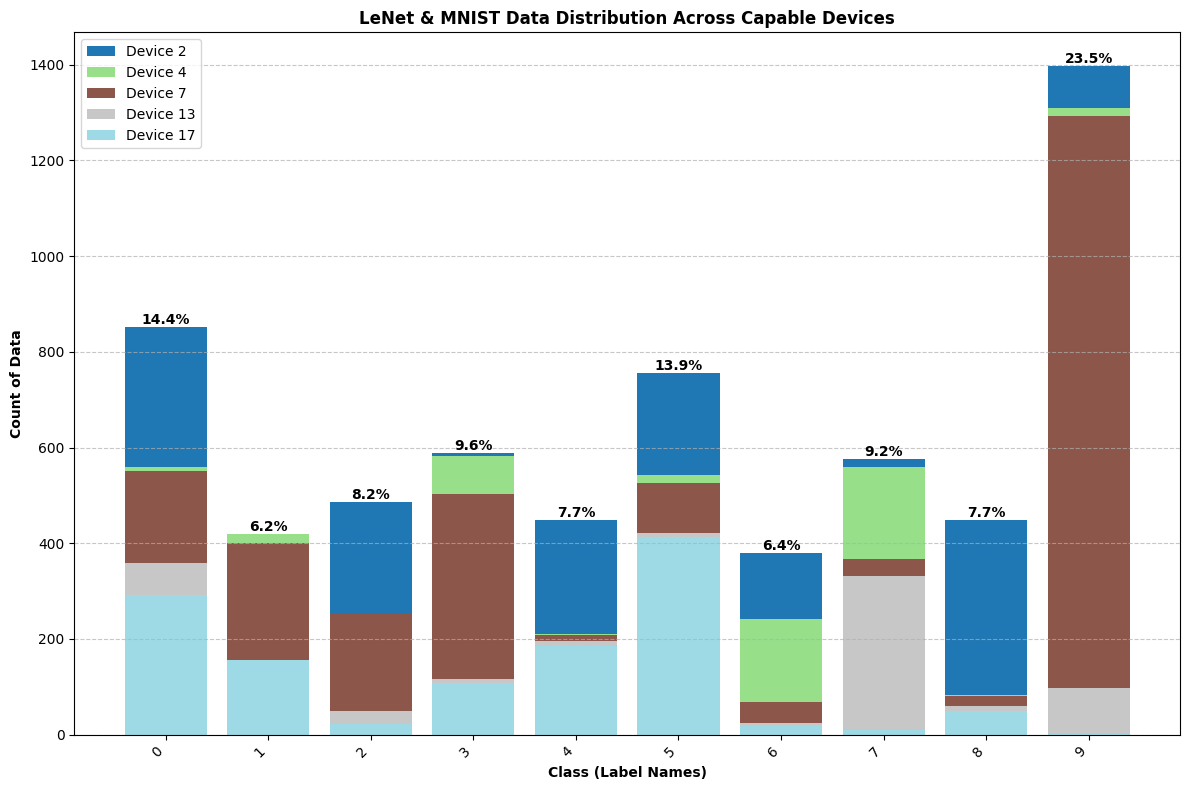

In [56]:
# NEW: Get total class counts
total_class_counts = data_dist["total_class_counts"]

# Create a 2D NumPy array: rows = classes, columns = devices
counts = np.zeros((num_classes, num_devices))
for i, dev in enumerate(devices):
    counts[:, i] = data_dist["distributions"][str(dev)]  # Keys are strings in JSON

fig, ax = plt.subplots(figsize=(12, 8))
bottom = np.zeros(num_classes)
colors = plt.cm.tab20(np.linspace(0, 1, num_devices))

# Plot in reverse so last device is at the bottom of the stack
for i, dev in reversed(list(enumerate(devices))):
    ax.bar(class_names, counts[:, i],
           bottom=bottom,
           label=f"Device {dev}",
           color=colors[i])
    bottom += counts[:, i]

# Percentages on top of each full bar
total_heights = np.sum(counts, axis=1)
for i in range(num_classes):
    if total_class_counts[i] > 0:
        percentage = (total_heights[i] / total_class_counts[i]) * 100
        ax.text(i, total_heights[i], f"{percentage:.1f}%",
                ha='center', va='bottom', fontweight='bold')
    else:
        ax.text(i, total_heights[i], "0.0%",
                ha='center', va='bottom', fontweight='bold')

ax.set_ylabel("Count of Data", fontweight='bold')
ax.set_xlabel("Class (Label Names)", fontweight='bold')
ax.set_title(f"{model_name} & {dataset_name} Data Distribution Across Capable Devices",
             fontweight='bold')

# Reverse the legend so it matches the bar stacking (top→bottom)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
fig.savefig(os.path.join(f"{model_name}_{dataset_name}", f"{model_name}_{dataset_name}_capable_device_data_distribution.png"))
plt.show()